**Import Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7LsurTV8u_bgmuCJzlBDy6xydbQJXNTTA3tc6GQPGBWsxxN7ryyFc


In [ ]:
!pip install kaggle
!pip install split-folders

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/Kaggle"

**Import the Dataset from Kaggle**

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria
!ls
!unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [ ]:
from __future__ import absolute_import, division, print_function
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import splitfolders

In [ ]:
base_path = '/content/cell_images/cell_images/'
print(os.listdir(base_path))
print(f'Total Parasitized images {len(os.listdir(os.path.join(base_path, "Parasitized")))}')
print(f'Total Uninfected images {len(os.listdir(os.path.join(base_path, "Uninfected")))}')

['Uninfected', 'Parasitized']
Total Parasitized images 13780
Total Uninfected images 13780


**Split the Data**

In [ ]:
#os.mkdir('/content/images') 
input_folder = os.path.join(base_path, '/content/cell_images/cell_images')
output_folder = '/content/images'
splitfolders.ratio(input_folder, output=output_folder, seed=10, ratio=(.85, .10, .05), group_prefix=None)

Copying files: 27560 files [00:04, 6663.92 files/s]


In [ ]:
input_path = '/content/images'
for folder in os.listdir(input_path):
    print(folder)
    print(os.listdir(os.path.join(input_path, folder)))

val
['Uninfected', 'Parasitized']
train
['Uninfected', 'Parasitized']
test
['Uninfected', 'Parasitized']


In [ ]:
train_dir = os.path.join(input_path, 'train')
test_dir = os.path.join(input_path, 'test')
val_dir = os.path.join(input_path, 'val')

train_Parasitized_dir = os.path.join(train_dir, 'Parasitized')
train_Uninfected_dir = os.path.join(train_dir, 'Uninfected')

validation_Parasitized_dir = os.path.join(val_dir, 'Parasitized')
validation_Uninfected_dir = os.path.join(val_dir, 'Uninfected')

test_Parasitized_dir = os.path.join(test_dir, 'Parasitized')
test_Uninfected_dir = os.path.join(test_dir, 'Uninfected')

print('total training Parasitized images :', len(os.listdir(train_Parasitized_dir) ))
print('total training Uninfected images :', len(os.listdir(train_Uninfected_dir) ))

print('total validation Parasitized images :', len(os.listdir(validation_Parasitized_dir) ))
print('total validation Uninfected images :', len(os.listdir(validation_Uninfected_dir) ))

print('total test Parasitized images :', len(os.listdir(test_Parasitized_dir) ))
print('total test Uninfected images :', len(os.listdir(test_Uninfected_dir) ))

total training Parasitized images : 11713
total training Uninfected images : 11713
total validation Parasitized images : 1378
total validation Uninfected images : 1378
total test Parasitized images : 689
total test Uninfected images : 689


**Data Visualization**

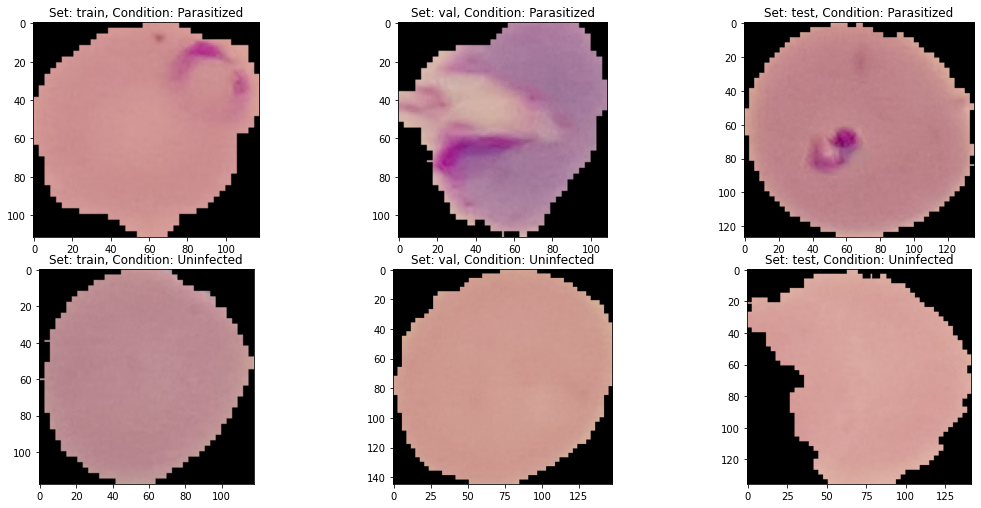

In [ ]:
input_path = '/content/images/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/Parasitized/'+os.listdir(set_path+'/Parasitized')[0]))
    ax[i].set_title('Set: {}, Condition: Parasitized'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/Uninfected/'+os.listdir(set_path+'/Uninfected')[0]))
    ax[i+3].set_title('Set: {}, Condition: Uninfected'.format(_set))

In [ ]:
import fnmatch
import math
import tensorflow as tf
from time import sleep
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,MaxPooling2D,Activation
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as k
import matplotlib.image as mpimg
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from keras import models
from sklearn.preprocessing import label_binarize
import itertools

**Data Preperation and Augmentation**

In [ ]:
image_shape = [224, 224]
batch_size = 64
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.2)

In [ ]:
train_generator = image_gen.flow_from_directory(train_dir,
                                                    target_size = (image_shape[0], image_shape[1]),
                                                    batch_size = batch_size,
                                                    class_mode = 'binary',
                                                    shuffle = True
                                                   )

validation_generator = image_gen.flow_from_directory(val_dir,
                                                  target_size = (image_shape[0], image_shape[1]),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary',
                                                  shuffle = True
                                                 )

test_generator = image_gen.flow_from_directory(test_dir,
                                                  target_size = (image_shape[0], image_shape[1]),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary',
                                                  shuffle = True)

Found 23424 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.
Found 1378 images belonging to 2 classes.


================================================================================

**CNN ARCHITECTURE (ADAM)**

In [ ]:
model=Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1

**Compile the Model**

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
filepath = '/content/drive/MyDrive/CNN_Project/my_bbest_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

Model Callbacks

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.1
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=1)

In [ ]:
callbacks = [checkpoint, early_stopping, lr_scheduler]

**Model Fiting**

In [ ]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),
                          epochs=15,validation_data=validation_generator,
                          validation_steps=len(validation_generator),
                          callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
366/366 [==============================] - 288s 745ms/step - loss: 0.5617 - accuracy: 0.6998 - val_loss: 0.2052 - val_accuracy: 0.9372

Epoch 00001: val_loss improved from inf to 0.20518, saving model to /content/drive/MyDrive/CNN_Project/my_bbest_model.epoch01-loss0.21.hdf5
Epoch 2/15

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
366/366 [==============================] - 275s 752ms/step - loss: 0.2121 - accuracy: 0.9339 - val_loss: 0.1710 - val_accuracy: 0.9467

Epoch 00002: val_loss improved from 0.20518 to 0.17104, saving model to /content/drive/MyDrive/CNN_Project/my_bbest_model.epoch02-loss0.17.hdf5
Epoch 3/15

Epoch 00003: LearningRateScheduler reducing learning rate to 0.001.
366/366 [==============================] - 273s 745ms/step - loss: 0.1790 - accuracy: 0.9480 - val_loss: 0.1569 - val_accuracy: 0.9536

Epoch 00003: val_loss improved from 0.17104 to 0.15693, saving model

**Plots for Accuracy and Loss**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

Accuracy

<Figure size 432x288 with 0 Axes>

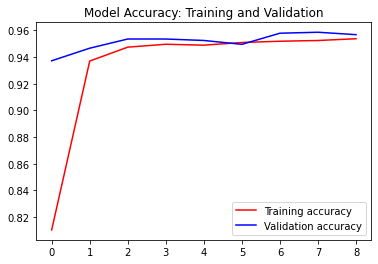

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Model Accuracy: Training and Validation')
plt.legend(loc=0)
plt.figure()

Loss

<Figure size 432x288 with 0 Axes>

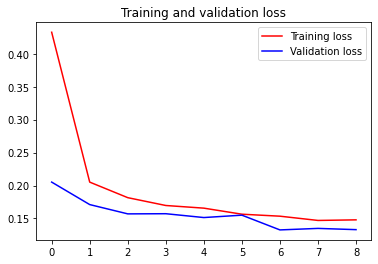

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

**Model Prediction and Evaluation on Unseen Data**

In [ ]:
saved_model = tf.keras.models.load_model('/content/drive/MyDrive/CNN_Project/my_bbest_model.epoch07-loss0.13.hdf5')

In [ ]:
model_test_performace = saved_model.evaluate(test_generator)

22/22 [==============================] - 14s 648ms/step - loss: 0.1471 - accuracy: 0.9507


In [ ]:
test_accuracy = model_test_performace[1]

print(f'Test accuracy: {round(test_accuracy*100, 2)}%')

Test accuracy: 95.07%


================================================================================

**FREEZING (ADAM)**

In [ ]:
for layer in model.layers[:6]:
  layer.trainable = False

for layer in model.layers:
  print(layer.trainable)

False
False
False
False
False
False
True
True
True
True
True
True
True


COMPILE THE MODEL

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
filepath = '/content/drive/MyDrive/CNN_Project/my_bbbest_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.1
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=1)

In [ ]:
callbacks = [checkpoint, early_stopping, lr_scheduler]

MODEL FITING

In [ ]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),
                          epochs=15,validation_data=validation_generator,
                          validation_steps=len(validation_generator),
                          callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
366/366 [==============================] - 266s 728ms/step - loss: 0.1343 - accuracy: 0.9559 - val_loss: 0.1270 - val_accuracy: 0.9550

Epoch 00001: val_loss improved from 0.13239 to 0.12703, saving model to /content/drive/MyDrive/CNN_Project/my_bbbest_model.epoch01-loss0.13.hdf5
Epoch 2/15

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
366/366 [==============================] - 263s 720ms/step - loss: 0.1320 - accuracy: 0.9556 - val_loss: 0.1243 - val_accuracy: 0.9565

Epoch 00002: val_loss improved from 0.12703 to 0.12430, saving model to /content/drive/MyDrive/CNN_Project/my_bbbest_model.epoch02-loss0.12.hdf5
Epoch 3/15

Epoch 00003: LearningRateScheduler reducing learning rate to 0.001.
366/366 [==============================] - 263s 719ms/step - loss: 0.1311 - accuracy: 0.9560 - val_loss: 0.1183 - val_accuracy: 0.9575

Epoch 00003: val_loss improved from 0.12430 to 0.11832, saving

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

ACCURACY

<Figure size 432x288 with 0 Axes>

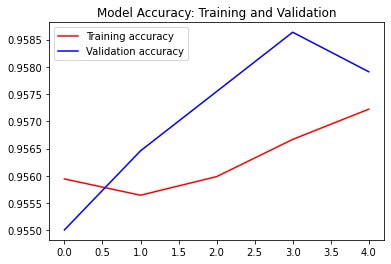

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Model Accuracy: Training and Validation')
plt.legend(loc=0)
plt.figure()

LOSS

<Figure size 432x288 with 0 Axes>

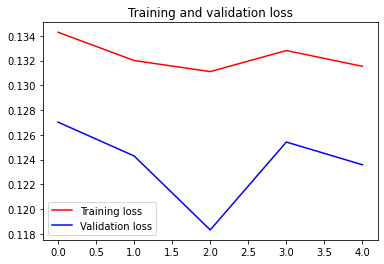

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

PREDICTION AND EVALUATION

In [ ]:
saved_model_1 = tf.keras.models.load_model('/content/drive/MyDrive/CNN_Project/my_bbbest_model.epoch03-loss0.12.hdf5')

In [ ]:
model_test_performace_1 = saved_model_1.evaluate(test_generator)

22/22 [==============================] - 14s 644ms/step - loss: 0.1127 - accuracy: 0.9615


In [ ]:
test_accuracy = model_test_performace_1[1]

print(f'Test accuracy: {round(test_accuracy*100, 2)}%')

Test accuracy: 96.15%


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np

In [ ]:
def predict(img):
    x = image.img_to_array(img)
    x = x/255.0
    x = np.expand_dims(x,axis=0)
    y = model.predict(x)
    return y

Predicted: [[0.992833]]


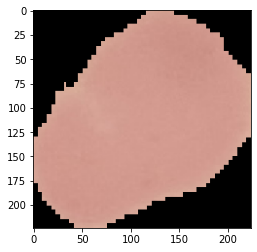

In [ ]:
img=image.load_img('/content/cell_images/cell_images/Uninfected/C105P66ThinF_IMG_20150924_095716_cell_98.png', target_size=(224, 224))
plt.imshow(img)
print("Predicted:", predict(img))

Predicted: [[0.01007958]]


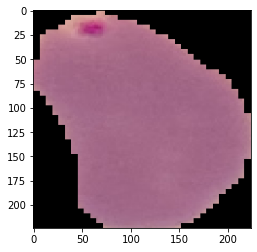

In [ ]:
img=image.load_img('/content/cell_images/cell_images/Parasitized/C116P77ThinF_IMG_20150930_171809_cell_62.png', target_size=(224, 224))
plt.imshow(img)
print("Predicted:", predict(img))

================================================================================

**NEW CNN ARCHITECTURE (RMSPROP) - VGG19**

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [ ]:
vgg19 = VGG19(input_shape=[224,224] + [3],
                  weights='imagenet', 
                  include_top=False) 

# do not train the existing weights
for layer in vgg19.layers:
  layer.trainable = False

# defining input and output to the model
x = Flatten()(vgg19.output)
prediction = Dense(1, activation='sigmoid')(x)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:

model2 = Model(inputs = vgg19.input, outputs = prediction)

model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
filepath = '/content/drive/MyDrive/CNN_Project/my_bbbbest_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.1
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=1)

In [ ]:
callbacks = [checkpoint, early_stopping, lr_scheduler]

In [ ]:
history=model2.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),
                          epochs=15,validation_data=validation_generator,
                          validation_steps=len(validation_generator),
                          callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
366/366 [==============================] - 282s 770ms/step - loss: 0.4039 - accuracy: 0.8482 - val_loss: 0.2350 - val_accuracy: 0.9097

Epoch 00001: val_loss improved from 0.68704 to 0.23502, saving model to /content/drive/MyDrive/CNN_Project/my_bbbbest_model.epoch01-loss0.24.hdf5
Epoch 2/15

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
366/366 [==============================] - 280s 766ms/step - loss: 0.3780 - accuracy: 0.8607 - val_loss: 0.3325 - val_accuracy: 0.8672

Epoch 00002: val_loss did not improve from 0.23502
Epoch 3/15

Epoch 00003: LearningRateScheduler reducing learning rate to 0.001.
366/366 [==============================] - 279s 763ms/step - loss: 0.3596 - accuracy: 0.8686 - val_loss: 0.2248 - val_accuracy: 0.9122

Epoch 00003: val_loss improved from 0.23502 to 0.22480, saving model to /content/drive/MyDrive/CNN_Project/my_bbbbest_model.epoch03-loss0.22.hdf5
Epoch 4/1

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

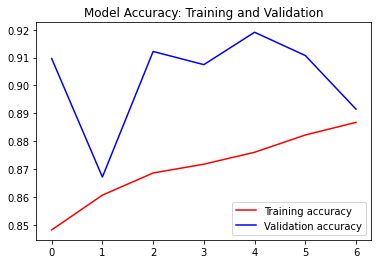

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Model Accuracy: Training and Validation')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

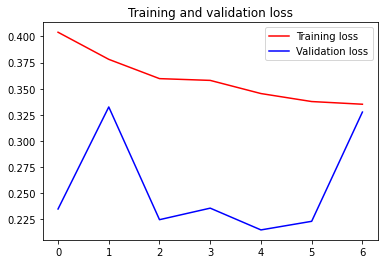

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [ ]:
saved_model_2 = tf.keras.models.load_model('/content/drive/MyDrive/CNN_Project/my_bbbbest_model.epoch05-loss0.22.hdf5')

In [ ]:
model_test_performace_2 = saved_model_2.evaluate(test_generator)

22/22 [==============================] - 17s 773ms/step - loss: 0.2185 - accuracy: 0.9267


In [ ]:
test_accuracy = model_test_performace_2[1]

print(f'Test accuracy: {round(test_accuracy*100, 2)}%')

Test accuracy: 92.67%


In [ ]:
def predict(img):
    x = image.img_to_array(img)
    x = x/255.0
    x = np.expand_dims(x,axis=0)
    y = model2.predict(x)
    return y

Predicted: [[0.9976719]]


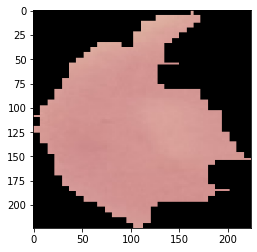

In [ ]:
img=image.load_img('/content/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_145042_cell_81.png', target_size=(224, 224))
plt.imshow(img)
print("Predicted:", predict(img))

Predicted: [[0.05892603]]


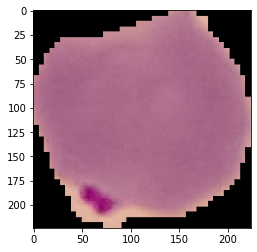

In [ ]:
img=image.load_img('/content/cell_images/cell_images/Parasitized/C116P77ThinF_IMG_20150930_171635_cell_97.png', target_size=(224, 224))
plt.imshow(img)
print("Predicted:", predict(img))